# Лабораторная работа №4

ФИО: Михин Михаил Владимирович 

Группа: БИВТ-22-СП-3

#### Задание:
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

## 1. Пример импорта данных. Грузим данные

In [117]:
import pandas as pd
data = pd.read_csv('Admission_Predict.csv', sep=',')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## 2. Понимаем, какая перед нами задача

### Перед нами задача регрессии т.к. целевая переменная колличественная и принимает значения из непрерывног диапазона

## 3. Делаем предобработку данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

targets = data['Chance of Admit ']
features = data.drop(columns=['Chance of Admit '])

features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Масштабирование числовых признаков
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


## Оформлем в виде класса Dataset и засовываем в Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class AdmissionDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets.values, dtype=torch.float32).unsqueeze(1)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Создаем объекты Dataset для обучающей и тестовой выборки
train_dataset = AdmissionDataset(features_train, targets_train)
test_dataset = AdmissionDataset(features_test, targets_test)

# Создаем DataLoader для обучения и тестирования
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


## Обучаем модель

1. Простая однослойная нейросеть с оптимизатором `SGD`

Epoch [1/10], Train Loss: 0.3097, Test Loss: 0.3242
Epoch [2/10], Train Loss: 0.2854, Test Loss: 0.2979
Epoch [3/10], Train Loss: 0.2643, Test Loss: 0.2751
Epoch [4/10], Train Loss: 0.2460, Test Loss: 0.2552
Epoch [5/10], Train Loss: 0.2300, Test Loss: 0.2377
Epoch [6/10], Train Loss: 0.2159, Test Loss: 0.2222
Epoch [7/10], Train Loss: 0.2033, Test Loss: 0.2085
Epoch [8/10], Train Loss: 0.1922, Test Loss: 0.1963
Epoch [9/10], Train Loss: 0.1822, Test Loss: 0.1853
Epoch [10/10], Train Loss: 0.1732, Test Loss: 0.1755


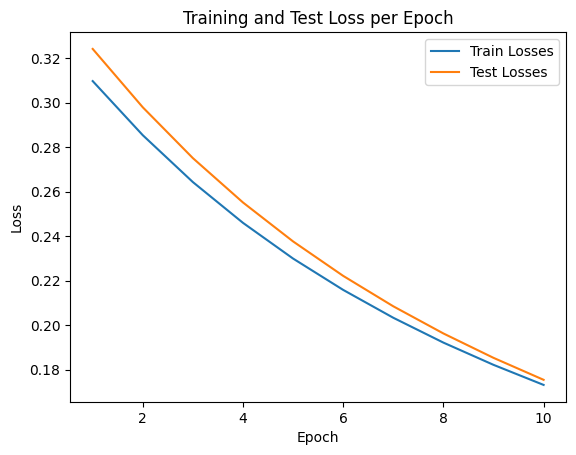

MAE на train: 0.3612
MAE на test: 0.3654


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

class SingleLayerModel(nn.Module):
    def __init__(self, input_size):
        super(SingleLayerModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Определяем гиперпараметры
learning_rate = 0.001
num_epochs = 10

# Инициализация модели, функции потерь и оптимизатора
model = SingleLayerModel(features_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

# Цикл обучения
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_features, batch_targets in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_features)
        loss = criterion(predictions, batch_targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Оценка на тестовой выборке
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_targets in test_loader:
            predictions = model(batch_features)
            loss = criterion(predictions, batch_targets)
            running_test_loss += loss.item()

    avg_test_loss = running_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Визуализация кривых обучения
plt.plot(range(1, num_epochs+1), train_losses, label='Train Losses')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss per Epoch')
plt.show()

# Прогноз на обучающем и тестовом наборах
model.eval()
with torch.no_grad():
    train_predictions = model(torch.tensor(features_train, dtype=torch.float32)).numpy()
    test_predictions = model(torch.tensor(features_test, dtype=torch.float32)).numpy()

mae_train = mean_absolute_error(targets_train, train_predictions)
mae_test = mean_absolute_error(targets_test, test_predictions)

print(f"MAE на train: {mae_train:.4f}")
print(f"MAE на test: {mae_test:.4f}")


2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam`

Epoch [1/10], Train Loss: 0.5583, Test Loss: 0.3471
Epoch [2/10], Train Loss: 0.2169, Test Loss: 0.1172
Epoch [3/10], Train Loss: 0.0768, Test Loss: 0.0475
Epoch [4/10], Train Loss: 0.0426, Test Loss: 0.0367
Epoch [5/10], Train Loss: 0.0323, Test Loss: 0.0269
Epoch [6/10], Train Loss: 0.0256, Test Loss: 0.0203
Epoch [7/10], Train Loss: 0.0205, Test Loss: 0.0173
Epoch [8/10], Train Loss: 0.0177, Test Loss: 0.0157
Epoch [9/10], Train Loss: 0.0156, Test Loss: 0.0139
Epoch [10/10], Train Loss: 0.0140, Test Loss: 0.0123


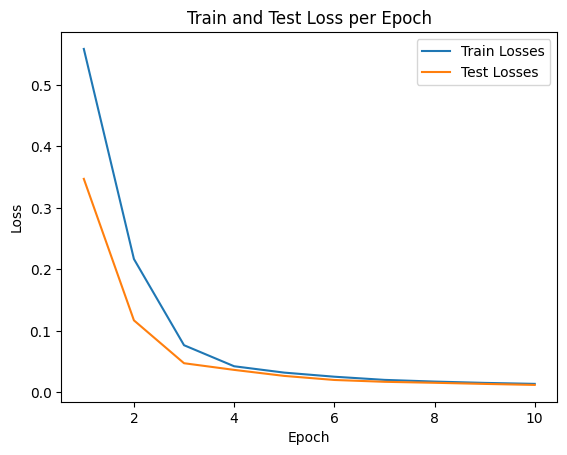

MAE на train: 0.0899
MAE на test: 0.0927


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

class ComplexNN(nn.Module):
    def __init__(self, input_size):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Инициализация модели, оптимизатора и критерия
model = ComplexNN(features_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSВELoss()

num_epochs = 10
train_losses = []
test_losses = []

# Цикл обучения
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for batch_features, batch_targets in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_features)
        # [batch_size, 1] что бф удостовериться что фигуры имеют целую форму 
        if batch_targets.dim() == 1:
            batch_targets = batch_targets.unsqueeze(1)
        loss = criterion(predictions, batch_targets)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Оценка на тестовой выборке
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_targets in test_loader:
            predictions = model(batch_features)
            if batch_targets.dim() == 1:
                batch_targets = batch_targets.unsqueeze(1)
            loss = criterion(predictions, batch_targets)
            running_test_loss += loss.item()

    avg_test_loss = running_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Визуализация кривых обучения
plt.plot(range(1, num_epochs+1), train_losses, label='Train Losses')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss per Epoch')
plt.show()

# Прогноз на обучающих и тестовых данных
model.eval()
with torch.no_grad():
    train_predictions = model(torch.tensor(features_train, dtype=torch.float32)).numpy()
    test_predictions = model(torch.tensor(features_test, dtype=torch.float32)).numpy()

mae_train = mean_absolute_error(targets_train, train_predictions)
mae_test = mean_absolute_error(targets_test, test_predictions)

print(f"MAE на train: {mae_train:.4f}")
print(f"MAE на test: {mae_test:.4f}")


3. Нейросеть еще сложнее (с 3 скрытыми слоями) с оптимизатором `Adam`

Epoch [1/10], Train Loss: 0.3760, Test Loss: 0.1787
Epoch [2/10], Train Loss: 0.0835, Test Loss: 0.0778
Epoch [3/10], Train Loss: 0.0564, Test Loss: 0.0280
Epoch [4/10], Train Loss: 0.0319, Test Loss: 0.0232
Epoch [5/10], Train Loss: 0.0190, Test Loss: 0.0188
Epoch [6/10], Train Loss: 0.0134, Test Loss: 0.0104
Epoch [7/10], Train Loss: 0.0099, Test Loss: 0.0082
Epoch [8/10], Train Loss: 0.0082, Test Loss: 0.0071
Epoch [9/10], Train Loss: 0.0074, Test Loss: 0.0064
Epoch [10/10], Train Loss: 0.0065, Test Loss: 0.0055


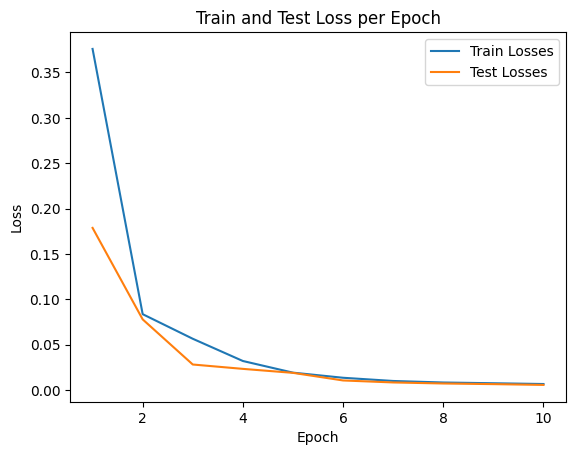

MAE на train: 0.0614
MAE на test: 0.0633


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

class DeepNN(nn.Module):
    def __init__(self, input_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Инициализация модели, критерия и оптимизатора
model = DeepNN(features_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 10
train_losses = []
test_losses = []

# Цикл обучения
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for batch_features, batch_targets in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_features)
        if batch_targets.dim() == 1:
            batch_targets = batch_targets.unsqueeze(1)
        loss = criterion(predictions, batch_targets)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Оценка модели на тестовой выборке
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for batch_features, batch_targets in test_loader:
            predictions = model(batch_features)
            if batch_targets.dim() == 1:
                batch_targets = batch_targets.unsqueeze(1)
            loss = criterion(predictions, batch_targets)
            running_test_loss += loss.item()

    avg_test_loss = running_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

# Визуализация кривых обучения
plt.plot(range(1, num_epochs+1), train_losses, label='Train Losses')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss per Epoch')
plt.show()

# Прогноз на обучающих и тестовых данных
model.eval()
with torch.no_grad():
    train_predictions = model(torch.tensor(features_train, dtype=torch.float32)).numpy()
    test_predictions = model(torch.tensor(features_test, dtype=torch.float32)).numpy()

mae_train = mean_absolute_error(targets_train, train_predictions)
mae_test = mean_absolute_error(targets_test, test_predictions)

print(f"MAE на train: {mae_train:.4f}")
print(f"MAE на test: {mae_test:.4f}")
